In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\XAI HEART ATTACK PREDICTION\heart.csv')

In [3]:
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [4]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(random_state=42)

In [7]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
print(f"Accuracy: {accuracy}")
print("Random Forest Classification Report:")
print(report)

Accuracy: 0.875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



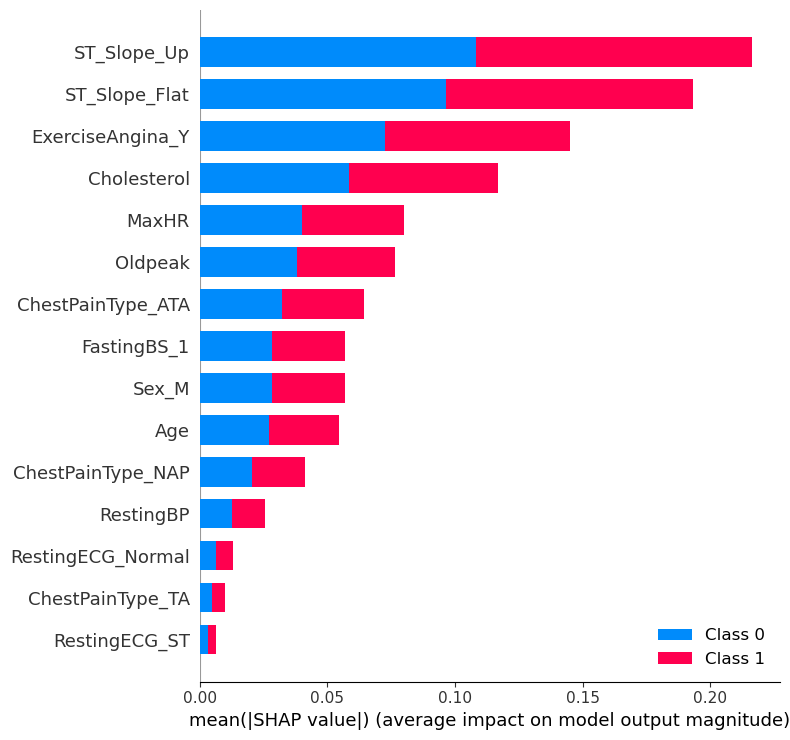

In [10]:

explainer = shap.TreeExplainer(rf_classifier)

shap_values = explainer.shap_values(X_test.iloc[:10])


shap.summary_plot(shap_values, X_test.iloc[:10], plot_type="bar")


In [11]:
#The color of the bars indicates the direction of the impact:
#Blue bars: Features that push the prediction towards a lower value (decreasing the probability of heart disease).
#Red bars: Features that push the prediction towards a higher value (increasing the probability of heart disease).

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [14]:

mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [15]:
from sklearn.metrics import classification_report, accuracy_score


In [16]:
# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

In [17]:

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

In [18]:
print(f"Accuracy (MLP): {accuracy_mlp}")
print(" Multilayer Perceptron Classification Report (MLP):")
print(report_mlp)

Accuracy (MLP): 0.8532608695652174
 Multilayer Perceptron Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [19]:
import shap
import numpy as np


In [20]:

def predict_fn(X):
    return mlp_classifier.predict_proba(X)[:, 1]  # Use predict_proba for probabilities of the positive class

# Initialize the SHAP explainer with the callable function using KernelExplainer
explainer_mlp = shap.KernelExplainer(predict_fn, X_train)

shap_values_mlp = explainer_mlp.shap_values(X_test.iloc[:10])

X does not have valid feature names, but MLPClassifier was fitted with feature names
Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/10 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

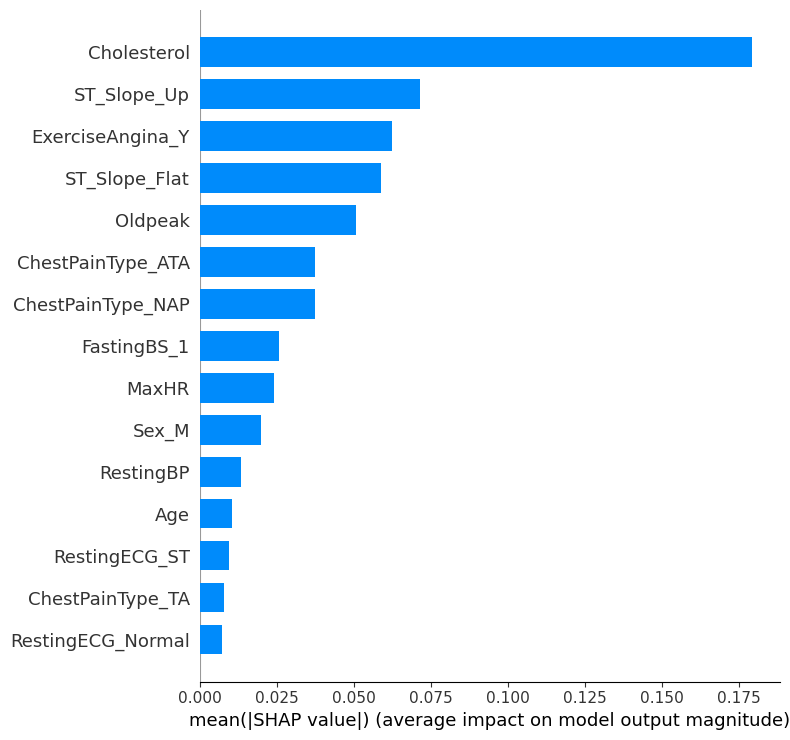

In [21]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values_mlp, X_test.iloc[:1], plot_type="bar")

plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [24]:

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report, accuracy_score


y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [26]:
print(f"Accuracy (Decision Tree): {accuracy_dt}")
print("Classification Report (Decision Tree):")
print(report_dt)

Accuracy (Decision Tree): 0.8532608695652174
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        77
           1       0.86      0.89      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [27]:

explainer_dt = shap.TreeExplainer(dt_classifier)


In [28]:

explainer_dt = shap.TreeExplainer(dt_classifier)


In [29]:

shap_values_dt = explainer_dt.shap_values(X_test.iloc[:10])


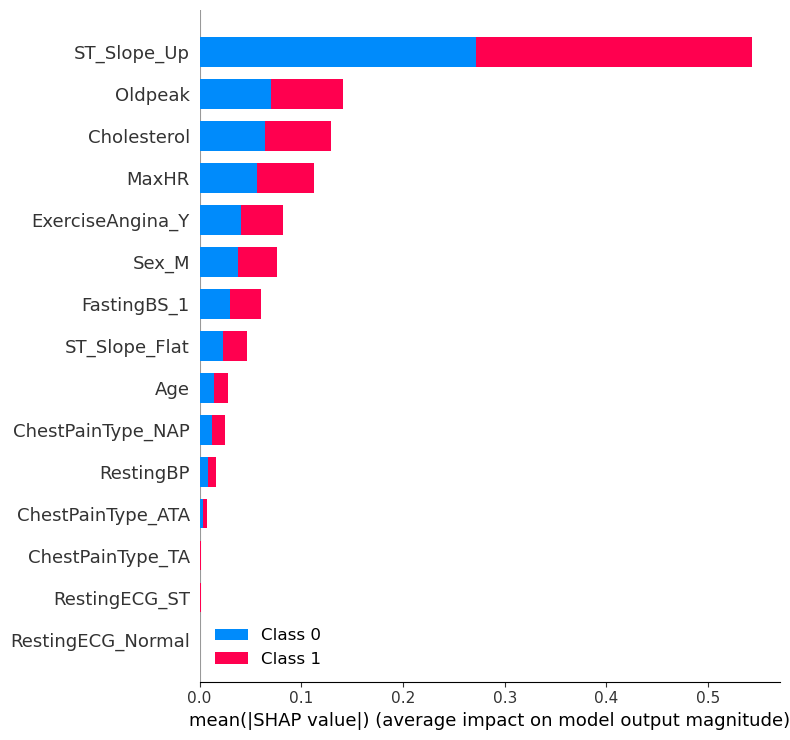

In [30]:

shap.summary_plot(shap_values_dt, X_test.iloc[:1], plot_type="bar")


In [31]:
from sklearn.neighbors import KNeighborsClassifier+

# Create a KNN classifier with a specified number of neighbors (e.g., 5 neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [32]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_knn = knn_classifier.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy (KNN): {accuracy_knn}")
print("Classification Report (KNN):")
print(report_knn)


Accuracy (KNN): 0.7065217391304348
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184



In [33]:
# Define a function that takes input and returns predictions
def predict_fn(X):
    return knn_classifier.predict_proba(X)[:, 1]  

explainer_knn = shap.KernelExplainer(predict_fn, X_train)


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [34]:

shap_values_knn = explainer_knn.shap_values(X_test.iloc[:10])


  0%|          | 0/10 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

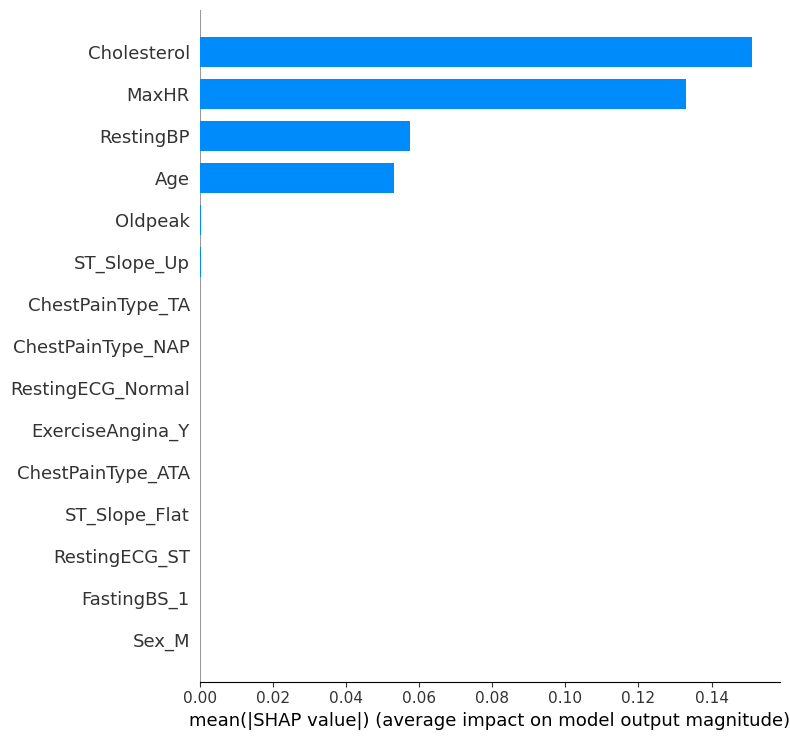

In [35]:
# Create a summary plot to show feature importances for a specific instance (e.g., the first instance)
shap.summary_plot(shap_values_knn, X_test.iloc[:1], plot_type="bar")


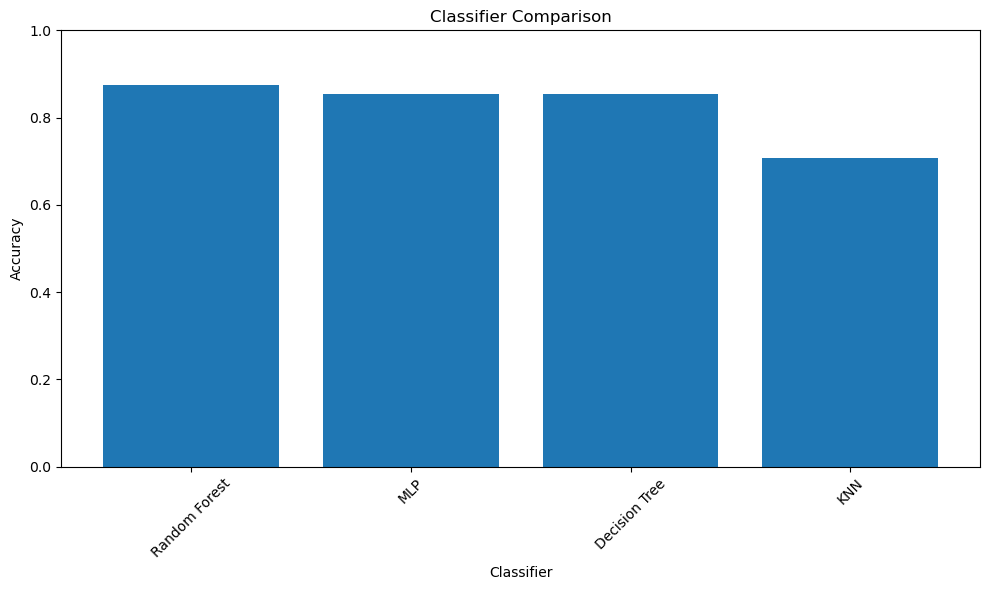

In [36]:
# Define a function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("MLP", MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=5))
]


accuracy_scores = []

# Loop through the classifiers
for classifier_name, classifier in classifiers:
    accuracy = train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test)
    accuracy_scores.append((classifier_name, accuracy))

# Create a bar plot to compare classifier accuracy
classifier_names, accuracies = zip(*accuracy_scores)
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Comparison")
plt.ylim(0.0, 1.0) 
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()